# HOS-Y1 simulations

In [1]:
cd ~/HOS-Y1-prep/hoscodes/

/global/u2/j/jatorres/HOS-Y1-prep/hoscodes


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from HOScodes import *
from itertools import combinations_with_replacement

In [3]:
plt.style.use('~/plots/presentation.mplstyle') #only to load mpl style params #Fix latex compiler

## Theory measurements

In [17]:
#Bins for map2 and map3
ell_map2_bins = np.arange(0,5001,1)
theta_tr = combinations_with_replacement([4,8,16,32],3)
theta_tr_map3_bins = list(theta_tr)
theta_tr_map3_bins
theta_format = [ '{0}\' {1}\' {2}\' '.format(*tr) for tr in theta_tr_map3_bins ]

In [4]:
ell_theory = np.loadtxt('../map2alm/theory/ell.txt')
map2alm_theory = []
map3_theory = []
PDF_theory = []
#PDF_theory2 = []
Nzbins = 5
for i in range(Nzbins):
    map2alm_theory.append(np.loadtxt('../map2alm/theory/bin_%d_%d.txt'%(i+1,i+1)))
    map3_theory.append(np.loadtxt('../Map3/TheoryPredictions/Map3_theo_tomo_%d.dat'%i))
    PDF_theory.append(np.loadtxt('../PDF_Peaks_Minima/TheoryPredictions/Theory_PDF_SkySim5000/kappa_PDF_DESC_LSST_theta_10.25_arcmin_bin%d.dat'%(i)))
    #PDF_theory2.append(np.loadtxt('../PDF_Peaks_Minima/Theory_PDF_SkySim5000/kappa_PDF_DESC_LSST_theta_10.25_arcmin_bin%d.dat'%(i)))

In [5]:
from scipy.interpolate import interp1d

In [6]:
Cl_ell_interp = []
for i in range(5):
    Cl_ell_interp.append(interp1d(ell_theory,map2alm_theory[i]))


## HACC150-Y1 simulation

## Load data

In [21]:
ell_map2_bins = np.arange(0,5001,1)

bins=np.linspace(-0.1-0.001,0.1+0.001,201) 
binmids_kappacounts=(bins[1:]+bins[:-1])/2

raw_maps_path = '/global/cfs/cdirs/desc-wl/projects/hos-tt/sims/L845/HACC150/'
sm_maps_path = '/pscratch/sd/j/jatorres/KappaMaps/Smoothed_Maps/HACC150/'

nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshell = 50
seed=0
nzs='kappa_Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+f'shells_z{nshell}_subsampleauto_groupiso/'+nzs+f'/kappa_hacc_nz%d_nside4096_seed{seed}.fits'%l for l in range(5)]
sm_filenames = [sm_maps_path+'smoothed_map_kappa_hacc_nz%d_nside4096_seed0_nshell%d.fits'%(l,nshell) for l in range(5)]

HACC150_nshells50_map2 = []
HACC150_nshells50_map3 = []
HACC150_nshells50_counts = []
HACC150_nshells50_peaks = []
HACC150_nshells50_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    sm_mapname = sm_filenames[i-1].split('/')[-1]
    HACC150_nshells50_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell50_map2_Cell_ell_0_5000.dat'))
    HACC150_nshells50_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell50_map3_DV_thetas.dat'))
    HACC150_nshells50_counts.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_Counts_kappa_width0.1_200Kappabins.dat'))
    HACC150_nshells50_peaks.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_peaks_posRADEC_amp.dat'))
    HACC150_nshells50_minima.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_minima_posRADEC_amp.dat'))
    
raw_maps_path = '/global/cscratch1/sd/xuod/HOS_sims/L845/HACC150/'
sm_maps_path = '/global/cscratch1/sd/jatorres/smoothed_maps/HACC150/'
nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshell = 106
seed=0
nzs='kappa_Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+f'shells_z{nshell}_subsampleauto_groupiso/'+nzs+f'/kappa_hacc_nz%d_nside4096_seed{seed}.fits'%l for l in range(5)]
sm_filenames = [sm_maps_path+'smoothed_map_kappa_hacc_nz%d_nside4096_seed0_nshell%d.fits'%(l,nshell) for l in range(5)]
#
#kappa_maps_HAC150_nshells106 = hoscodes(filenames=filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells106.readmaps_fits()#read the maps from a healpy map(masked) file
#kappa_maps_HAC150_nshells106_smoothed = hoscodes(filenames=sm_filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells106_smoothed.readmaps_healpy()#read the maps from a healpy map(masked) file
#
HACC150_nshells106_map2 = []
HACC150_nshells106_map3 = []
HACC150_nshells106_counts = []
HACC150_nshells106_peaks = []
HACC150_nshells106_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    sm_mapname = sm_filenames[i-1].split('/')[-1]
    HACC150_nshells106_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell106_map2_Cell_ell_0_5000.dat'))
    HACC150_nshells106_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell106_map3_DV_thetas.dat'))
    HACC150_nshells106_counts.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell106_Counts_kappa_width0.1_200Kappabins.dat'))
    HACC150_nshells106_peaks.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell106_peaks_posRADEC_amp.dat'))
    HACC150_nshells106_minima.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell106_minima_posRADEC_amp.dat'))
    
raw_maps_path = '/global/cscratch1/sd/xuod/HOS_sims/L845/HACC150/'
sm_maps_path = '/global/cscratch1/sd/jatorres/smoothed_maps/HACC150/'
nside= 4096# We down the original resolution (NSIDE=8192) to the one used by the other maps
thetas=[4,8,16,32] #Aperture radii Map3
nshell = 19
seed=0
nzs='kappa_Euclid_dndz_fu08_bin1-5'
#
filenames = [raw_maps_path+f'shells_z{nshell}_subsampleauto_groupiso/'+nzs+f'/kappa_hacc_nz%d_nside4096_seed{seed}.fits'%l for l in range(5)]
sm_filenames = [sm_maps_path+'smoothed_map_kappa_hacc_nz%d_nside4096_seed0_nshell%d.fits'%(l,nshell) for l in range(5)]
#
#kappa_maps_HAC150_nshells19 = hoscodes(filenames=filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells19.readmaps_fits()#read the maps from a healpy map(masked) file
#kappa_maps_HAC150_nshells19_smoothed = hoscodes(filenames=sm_filenames,nshells=nshell,seed=seed,nzs=nzs,nside=nside)
#kappa_maps_HAC150_nshells19_smoothed.readmaps_healpy()#read the maps from a healpy map(masked) file
#
HACC150_nshells19_map2 = []
HACC150_nshells19_map3 = []
HACC150_nshells19_counts = []
HACC150_nshells19_peaks = []
HACC150_nshells19_minima = []
dir_results = 'results/'
for i in range(1,6):
    mapname = filenames[i-1].split('/')[-1]
    sm_mapname = sm_filenames[i-1].split('/')[-1]
    HACC150_nshells19_map2.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell19_map2_Cell_ell_0_5000.dat'))
    HACC150_nshells19_map3.append(np.loadtxt(dir_results+mapname.split('.')[0]+'_nshell19_map3_DV_thetas.dat'))
    HACC150_nshells19_counts.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell19_Counts_kappa_width0.1_200Kappabins.dat'))
    HACC150_nshells19_peaks.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell19_peaks_posRADEC_amp.dat'))
    HACC150_nshells19_minima.append(np.loadtxt(dir_results+sm_mapname.split('.')[0]+'_nshell19_minima_posRADEC_amp.dat'))

### Re-binning data Map2

In [22]:
ell_rb = ell_map2_bins[50:-1].reshape(99,50).mean(axis=1)

In [23]:
map2_nshells50_rb = []
map2_nshells50_rb_std = []
map2_nshells106_rb = []
map2_nshells106_rb_std = []
map2_nshells19_rb = []
map2_nshells19_rb_std = []
for i in range(5):
    map2_rb = HACC150_nshells50_map2[i][50:-1].reshape(99,50)
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_nshells50_rb.append(map2_rb_mean)
    map2_nshells50_rb_std.append(map2_rb_std)
    map2_rb = HACC150_nshells106_map2[i][50:-1].reshape(99,50)
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_nshells106_rb.append(map2_rb_mean)
    map2_nshells106_rb_std.append(map2_rb_std)    
    map2_rb = HACC150_nshells19_map2[i][50:-1].reshape(99,50)
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_nshells19_rb.append(map2_rb_mean)
    map2_nshells19_rb_std.append(map2_rb_std)

## Map2alm

In [11]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

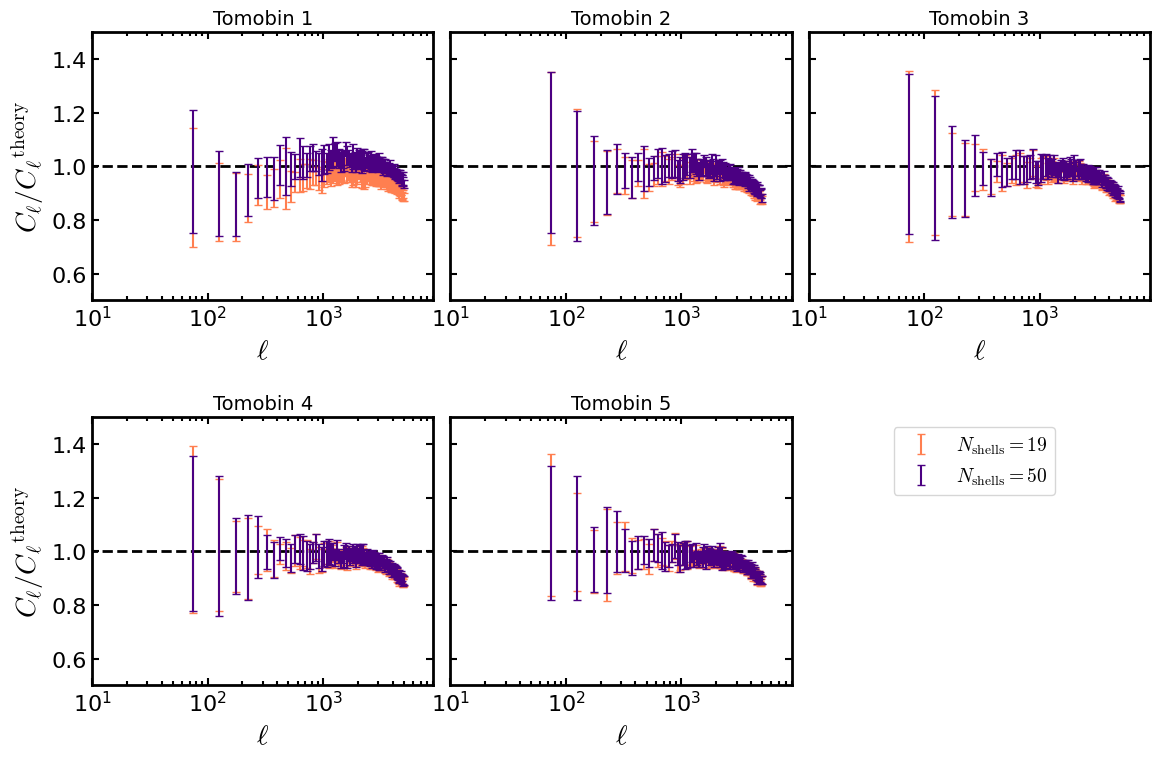

In [13]:
f,ax = plt.subplots(2,3,figsize=(12,8),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$C_\ell / C{_\ell}^{{\rm theory}}$')
ax[ax_d['3']].set_ylabel(r'$C_\ell / C{_\ell}^{{\rm theory}}$')

for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(ell_theory,np.ones_like(map2alm_theory[i]),'k',ls='--',lw=2)
    #l2 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells50_rb[i],yerr=map2_nshells50_rb_std[i],fmt='k.')
    #l3 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells19_rb[i],yerr=map2_nshells50_rb_std[i],fmt='b.')
    #l4 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells106_rb[i],yerr=map2_nshells50_rb_std[i],fmt='r.')
    l2 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells50_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells50_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='coral')
    l3 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells19_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells19_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='indigo')
    #l4 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells106_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells106_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='dodgerblue')
    ax[ax_d['%d'%i]].set_xlabel(r'$\ell$')
    ax[ax_d['%d'%i]].set_xscale('log')
    ax[ax_d['%d'%i]].set_xlim(11e0,9e3)
    ax[ax_d['%d'%i]].set_xticks([1e1,1e2,1e3])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
ax[1,1].legend([l2,l3],
               [r'$N_{\rm shells} = 19$',
                #r'$N_{\rm shells} = 106$',
                r'$N_{\rm shells} = 50$'],
               loc=1,
               bbox_to_anchor=(1.8,1.0))
ax[0,0].set_ylim(0.5,1.5)
#ax[0,0].set_yscale('log')
f.delaxes(ax[1,2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,)
plt.savefig('imgs/DESC_meeting/map2alm_Nshells_50_19_50ellbins.jpg',bbox_inches='tight')

## $M_{\rm ap}^3$

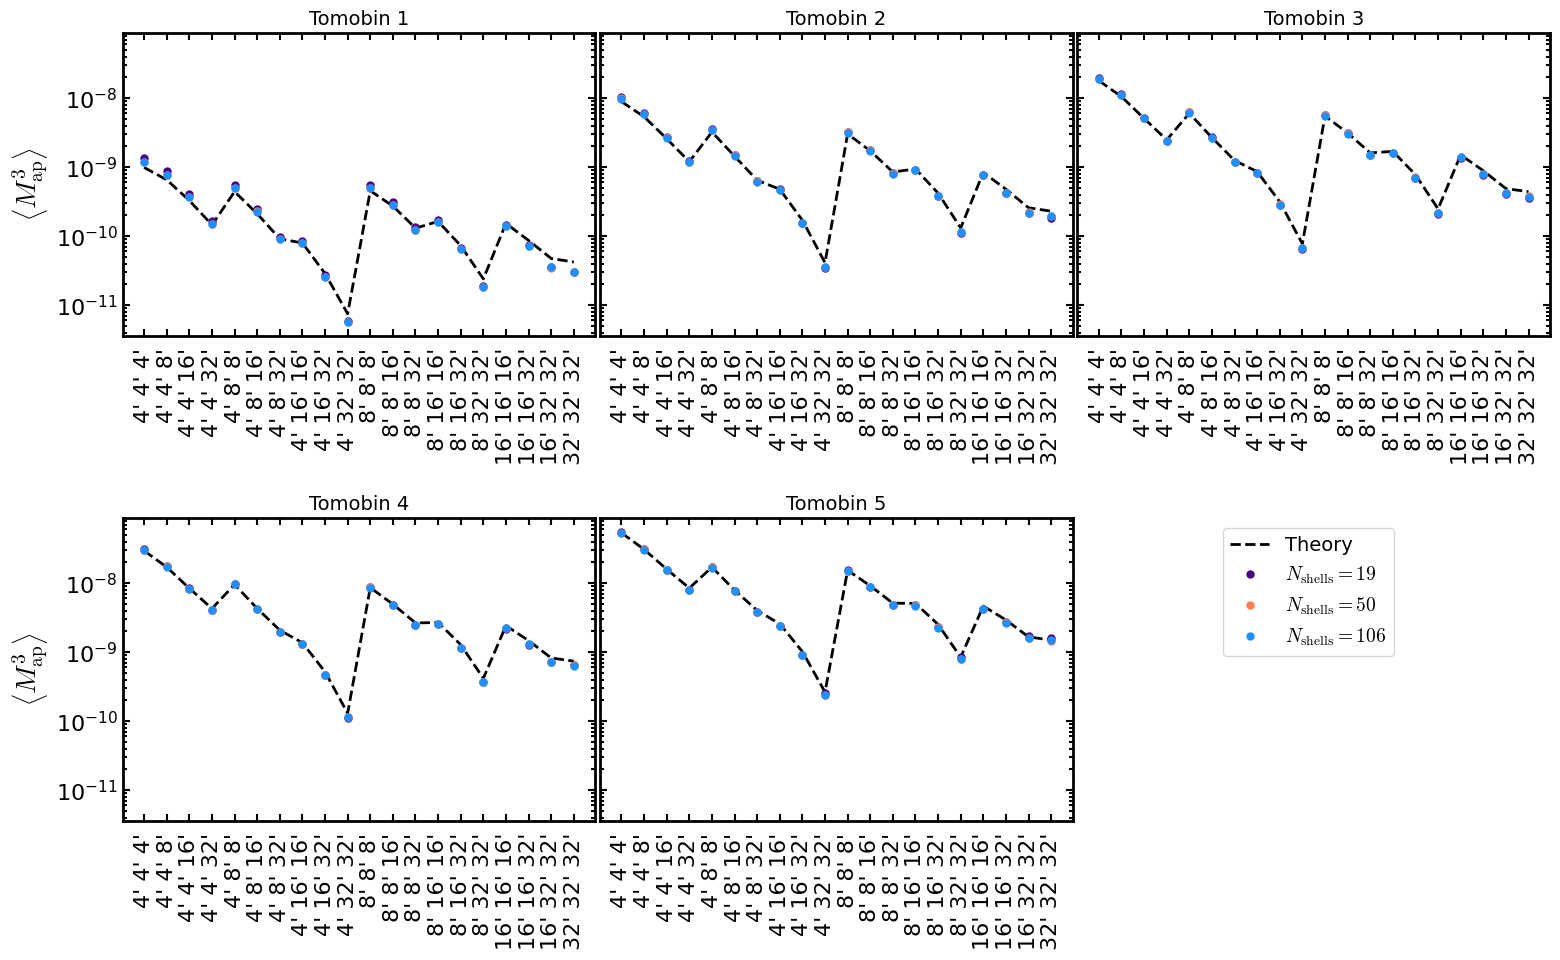

<Figure size 640x480 with 0 Axes>

In [24]:
f,ax = plt.subplots(2,3,figsize=(16,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>$')
ax[ax_d['3']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>$')
for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(np.arange(20),map3_theory[i][:,3],'k--',lw=2)
    l2, = ax[ax_d['%d'%i]].plot(np.arange(20),HACC150_nshells19_map3[i],c='indigo',ms=10,marker='.',ls=' ')
    l3, = ax[ax_d['%d'%i]].plot(np.arange(20),HACC150_nshells50_map3[i],c='coral',ms=10,marker='.',ls=' ')
    l4, = ax[ax_d['%d'%i]].plot(np.arange(20),HACC150_nshells106_map3[i],c='dodgerblue',ms=10,marker='.',ls=' ')
    ax[ax_d['%d'%i]].set_xticks(np.arange(20))
    ax[ax_d['%d'%i]].set_xticklabels(theta_format, minor=False, rotation=90)
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
f.delaxes(ax[1,2])    
a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
ax[0,0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[0,0].set_ylim(0.5,1.5)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()
plt.savefig('imgs/DESC_meeting/map3_Nshells_19_50_106.pdf',bbox_inches='tight')

In [25]:
t1 = np.loadtxt('../PDF_Peaks_Minima/TheoryPredictions/kappa_PDF_DESC_LSST_theta_10.25_arcmin_bin4.dat')
t2 = np.loadtxt('../PDF_Peaks_Minima/Theory_PDF_SkySim5000/kappa_PDF_DESC_LSST_theta_10.25_arcmin_bin3.dat')

## PDF

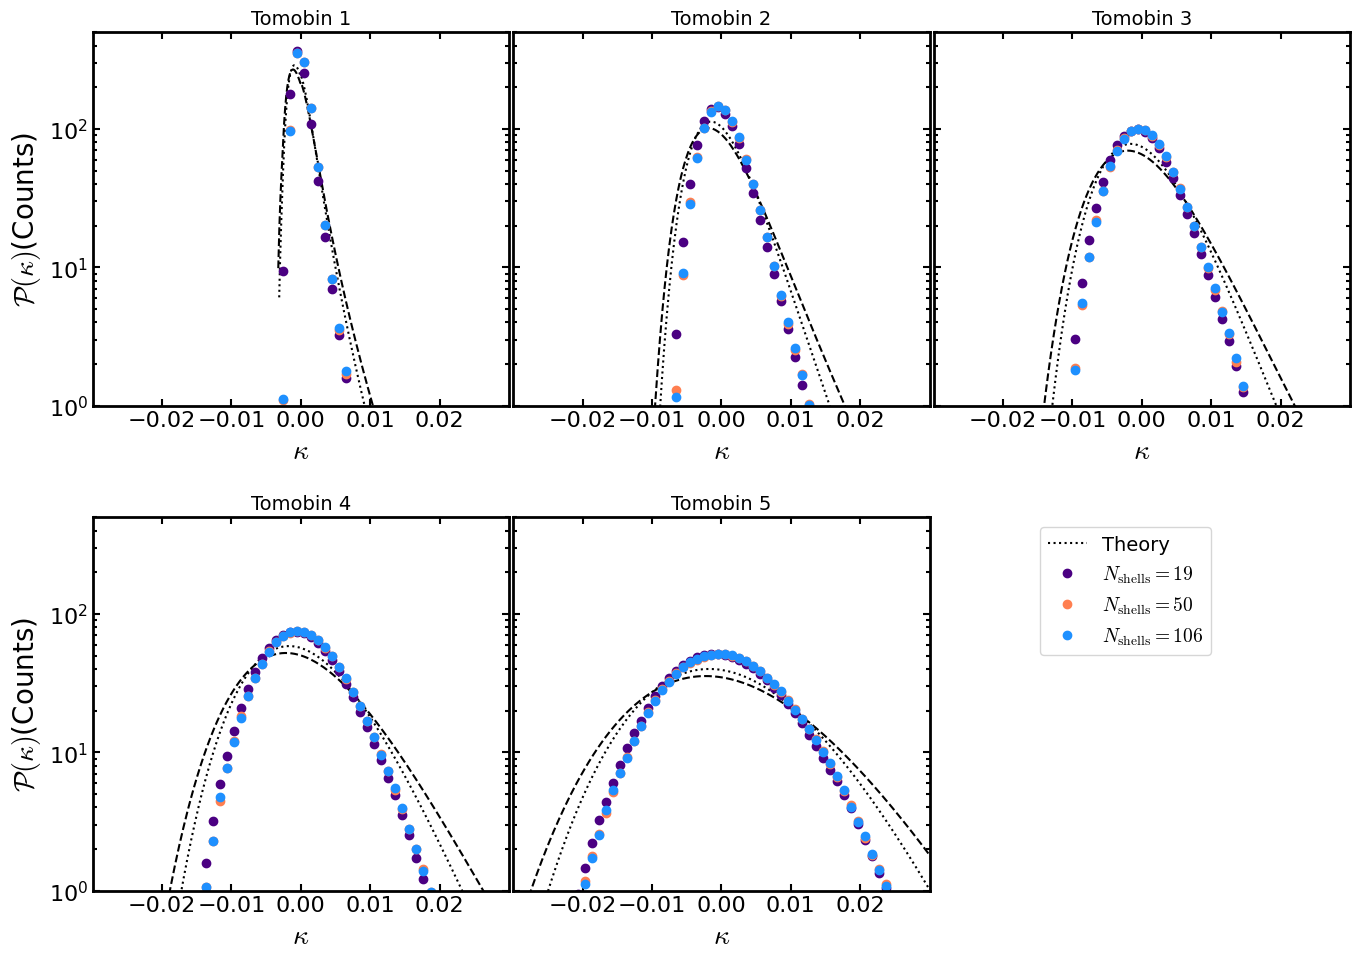

In [33]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

f,ax = plt.subplots(2,3,figsize=(14,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')
ax[ax_d['3']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')

for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(PDF_theory[i][:,0],PDF_theory[i][:,1],'k--')
    l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,HACC150_nshells19_counts[i],color='indigo',marker='o',ls=' ')
    l3, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,HACC150_nshells50_counts[i],color='coral',marker='o',ls=' ')
    l4, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,HACC150_nshells106_counts[i],color='dodgerblue',marker='o',ls=' ')
    #
    ax[ax_d['%d'%i]].set_xticks([-0.02,-0.01,0.0,0.01,0.02])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
    ax[ax_d['%d'%i]].set_xlim(-0.03,0.03)
    ax[ax_d['%d'%i]].set_xlabel(r'$\kappa$')
a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
f.delaxes(ax[1,2]) 
ax[0,0].set_yscale('log')
ax[0,0].set_ylim(1e0,5e2)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
#plt.savefig('imgs/DESC_meeting/PDF_Nshells_19_50_106.pdf',bbox_inches='tight')
plt.show()